In [1]:
from matplotlib import pyplot as plt
from matplotlib import projections
from matplotlib import cm
import  numpy as np
from sympy import symbols, diff
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
%matplotlib inline

# 3d charting
$f(x,y)=\frac{1}{3^{-x^2 - y^2}+1}$

In [2]:
def f(x,y):
    r=3**(-(x**2) - (y**2))
    return 1/(r+1)

In [3]:
# Make our x and our y 
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)

x, y = np.meshgrid(x, y)

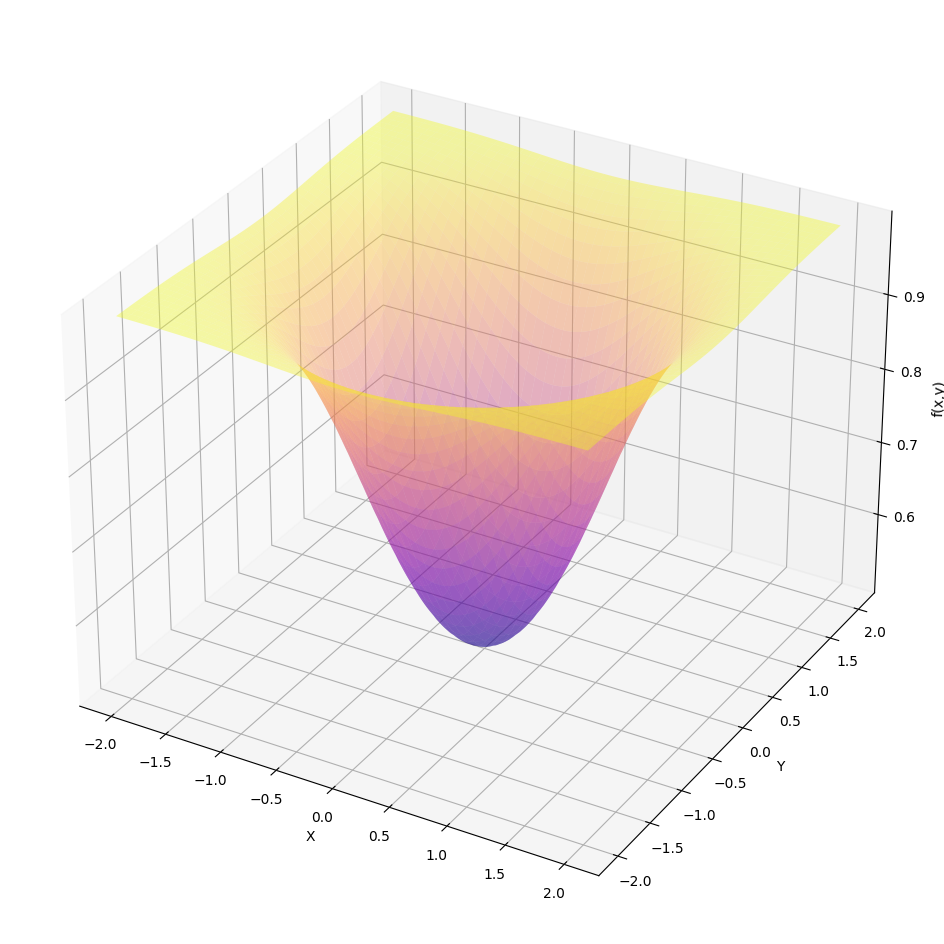

In [4]:
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x,y)")

ax.plot_surface(x, y, f(x,y), cmap=cm.plasma, alpha=0.4)
plt.show()


# Partial derivatives and symbolic computation   
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{(3^{-x^2 - y^2} + 1)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{(3^{-x^2 - y^2} + 1)^2}$$

In [5]:
# Telling symbols to use 'a' as 'x', and 'b' as 'y'
a, b = symbols('x, y')
print(f"Our cost function f(x, y) is: {f(a, b)}")

print(f"Partial derivatice with respect to x is: {diff(f(a,b), a)}")

print(f"Value of f(x,y) at (1.8, 1.0) is:{f(a, b).evalf(subs={a: 1.8, b: 1.0})}")

print(f"Slope of partial derivative with respect to x at (1.8, 1.0) is:{diff(f(a,b), a).evalf(subs={a: 1.8, b: 1.0})}")

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivatice with respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at (1.8, 1.0) is:0.990604794032582
Slope of partial derivative with respect to x at (1.8, 1.0) is:0.0368089716197505


# batch gradient descent with sympy

In [6]:
def fpx(x: float, y: float) -> float:
    top_line = 2 * x * math.log(3) * 3**(-x**2 - y**2)
    bottom_line = (3**(-x**2 - y**2) + 1)**2
    return top_line/bottom_line

def fpy(x: float, y: float) -> float:
    top_line = 2 * y * math.log(3) * 3**(-x**2 - y**2)
    bottom_line = (3**(-x**2 -y**2) + 1)**2
    return top_line/bottom_line

In [7]:
multiplier =  0.1
max_iter = 500

# The initial guess
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients)
print(f"Values in gradient array {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is {f(params[0], params[1])}")

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is 0.5


## Graphing 3d Gradient Descent and Adv Np arrays

In [8]:
multiplier =  0.1
max_iter = 500

# The initial guess
params = np.array([1.8, 1.0])
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients)
    # values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2),), axis=0)

# Results
print(f"Values in gradient array {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is {f(params[0], params[1])}")

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is 0.5


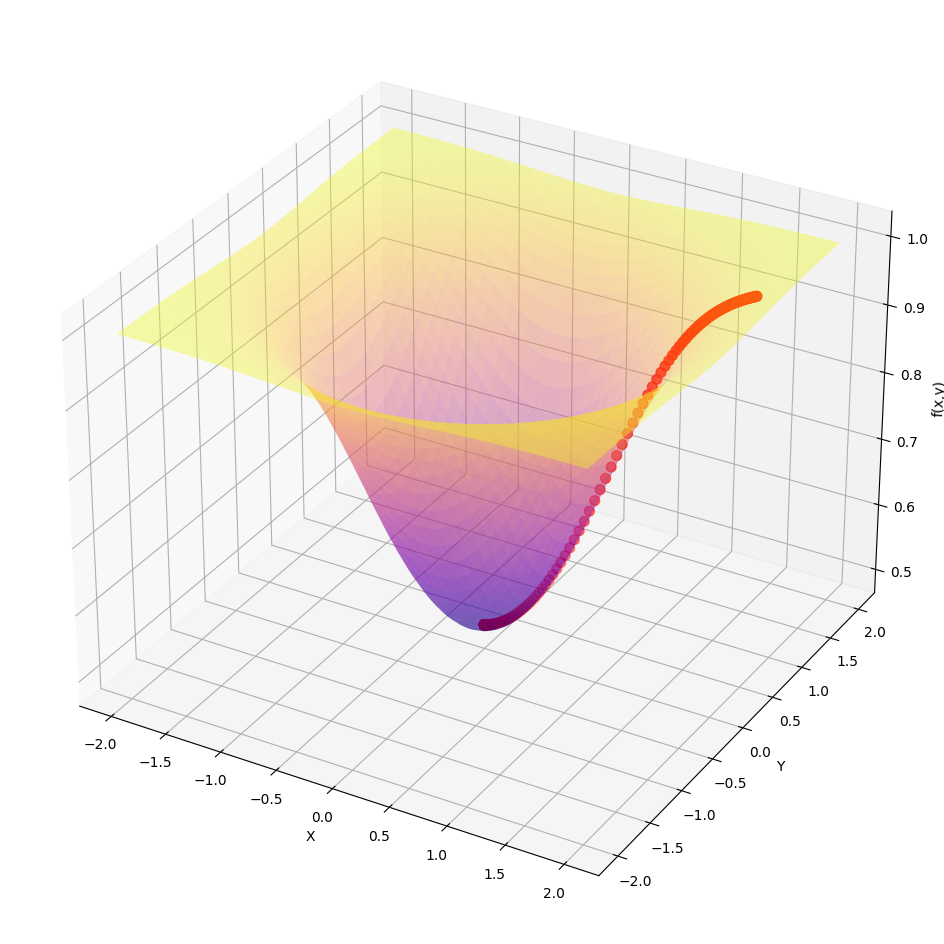

In [9]:
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x,y)")

ax.plot_surface(x, y, f(x,y), cmap=cm.plasma, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')
plt.show()


# Example 5: Working with data and a real cost function
## Mean square Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{i}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{i}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big(y - \hat{y}\big)^2$$

In [10]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)
print(f"Shape of x_5: {x_5.shape}")
print(f"Shape of y_5: {y_5.shape}")

Shape of x_5: (7, 1)
Shape of y_5: (7, 1)


In [11]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print(f"Theta 0: {regr.intercept_[0]}")
print(f"Theta 1: {regr.coef_[0][0]}")

Theta 0: 0.8475351486029554
Theta 1: 1.222726463783591


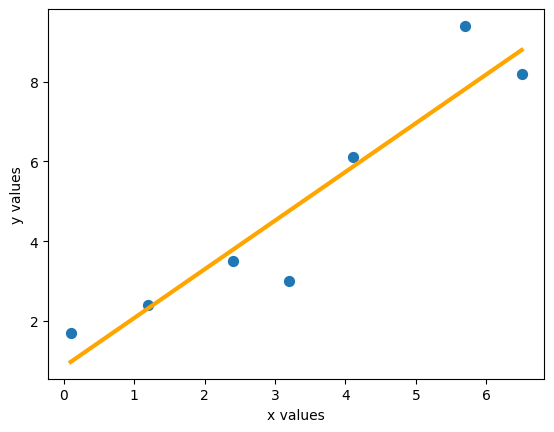

In [12]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [13]:
# y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029554 + 1.222726463783591 * x_5
print(f'Estimate values y_hat are \n{y_hat}')
print(f"In comparison, the actual y values are \n{y_5}")

Estimate values y_hat are 
[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [14]:
import sklearn


def mse(y, y_hat):
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

mse_result = mse(y_5, y_hat)
print(f"Manual mse: {mse_result}")
print(f"Manual MSE Using sklearn: {mean_squared_error(y_5, y_hat)}")
print(f"MSE Regression sklearn: {mean_squared_error(y_5, regr.predict(x_5))}")


Manual mse: [0.94796558]
Manual MSE Using sklearn: 0.9479655759794575
MSE Regression sklearn: 0.9479655759794575


## 3d plot for the MSE cost function
### Make data for theta

In [15]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

plot_cost = np.zeros((nr_thetas, nr_thetas), )

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print(f'shape of plot_t0', plot_t0.shape)
print(f'shape of plot_t1', plot_t1.shape)
print(f'shape of plot_cost', plot_cost.shape)

shape of plot_t0 (200, 200)
shape of plot_t1 (200, 200)
shape of plot_cost (200, 200)


In [18]:
print(f"Min value of plot_cost {plot_cost.min()}")
i, j = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print(f"Minimum occurs at {(i,j)}")
print(f'Min MSE for Theta_0 is {plot_t0[i][j]}')
print(f'Min MSE for Theta_1 is {plot_t1[i][j]}')

Min value of plot_cost 0.9483826526747164
Minimum occurs at (111, 91)
Min MSE for Theta_0 is 0.829145728643216
Min MSE for Theta_1 is 1.2311557788944723


# Partial derivatives of MSE with respect to $\theta_0$ and $\theta_1$
## $$ \frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n}\sum_{i=1}^{n}(y^i - \theta_0 - \theta_1x^i) $$
## $$ \frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n}\sum_{i=1}^{n}(y^i - \theta_0 - \theta_1x^i)(x^i) $$

In [25]:
def grad(x, y, thetas):
    n = y.size
    theta_0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta_1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    return np.array([theta_0_slope[0], theta_1_slope[0]])

multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Data points collection for scatter plots
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0]+ thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0]+ thetas[1] * x_5))

print(f"Min occurs at Theta 0: {thetas[0]}")
print(f"Min occurs at Theta 1: {thetas[1]}")
print(f"MSE is: {mse(y_5, thetas[0]+ thetas[1] * x_5)}")

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


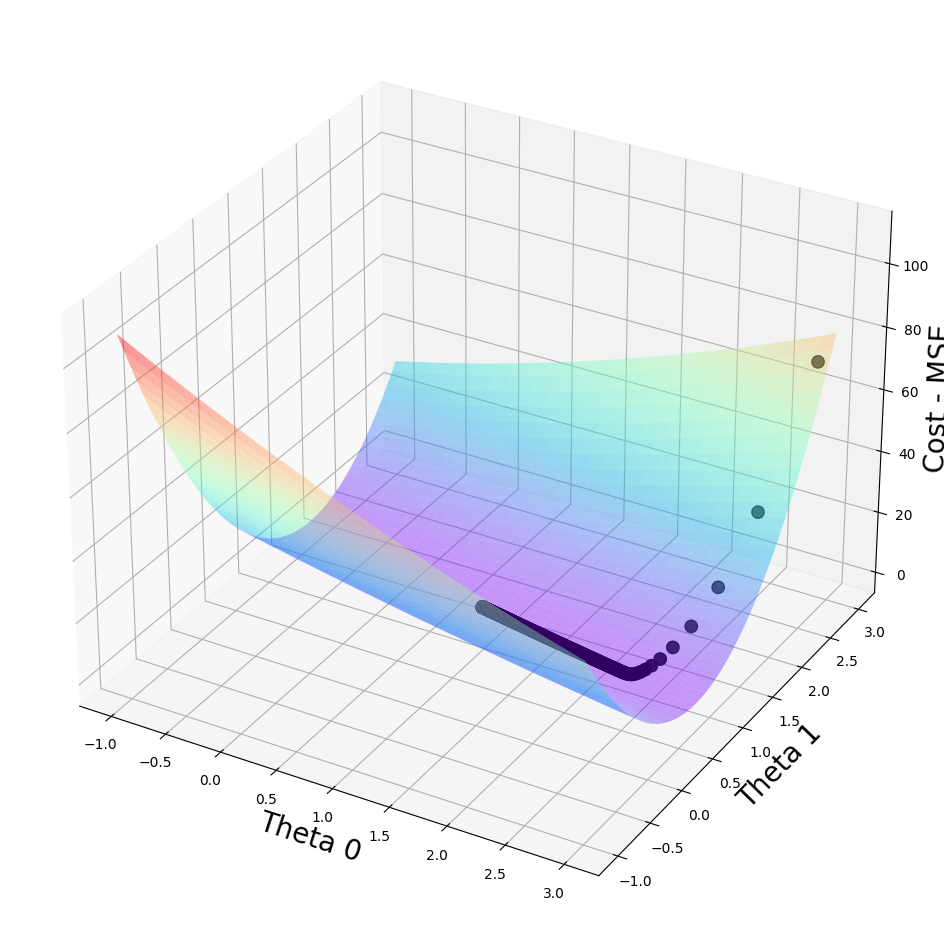

In [30]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = plt.axes(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel("Cost - MSE",fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)